# Исследование данных о компьютерных играх

Проект посвящён исследованию данных о компьютерных играх с целью выявить определяющие успешность игры закономерности.

Исследуемые данные за 1980-2016 годы включают в себя: данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

In [ ]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [ ]:
#сохраним полученные данные в датафрейм games
games = pd.read_csv('games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных

#### Переименование столбцов

In [ ]:
#приведём названия всех столбцов к нижнему регистру
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Работа с пропусками

In [ ]:
#ознакомимся с количеством пропусков в столбцах
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Количество пропусков в столбцах `name`, `year_of_release` и `genre` крайне мало, поэтому строки с пропусками в этих столбцах можно удалить без ущерба для исследования.

In [ ]:
#удалим строки с пропусками в столбце name
games = games.dropna(subset=['name']).reset_index(drop=True)
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [ ]:
#удалим строки с пропусками в столбце year_of_release
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Количество пропусков в столбцах `critic_score`, `user_score` и `rating` велико, поэтому удалить строки с пропусками в этих столбцах нельзя. Заполнить пропуски в этих столбцах какими-либо значениями не представляется возможным, поскольку в этих столбцах содержатся данные, которые невозможно рассчитать на основе других данных.

Пропуски в этих столбцах могут быть обусловлены отсутствием доступа к данным об оценках критиков и пользователей и о рейтинге.

#### Преобразование типов данных

Из общей информации о датафрейме (см. **2.1 Переименование столбцов**) видно, что данные столбца `year_of_release` имеют тип `float`, а данные `user_score` - тип `object`.

Столбец `year_of_release` содержит данные о годе, поэтому должен иметь тип данных `int`. Столбец `user_score` содержит числовые данные, поэтому должен иметь тип `float`.

In [ ]:
#приведём данные столбца year_of_release к типу int
games['year_of_release'] = games['year_of_release'].astype('int')

In [ ]:
#ознакомимся с уникальными данными столбца user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` встречается значение `tbd`, что обычно расшифровывается как *to be determined* (*будет определено*). То есть, это значение обозначает отсутствие данных. В рамках данного исследования уместно заменить `tbd` на пропуски значения.

In [ ]:
#приведём данные столбца year_of_release к типу datetime
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Добавление столбца

In [ ]:
#добавим в датафрейм столбец total_sales с данными о суммарных продажах каждй игры
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

#проверим, добавился ли новый столбец
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Обработка дубликатов

In [ ]:
#посчитаем количество строк-дубликатов датафрейме games
games.duplicated().sum()

0

In [ ]:
#посчитаем количество значений, повторяющихся в столбцах name, platform и year_of_release одновременно
games.loc[:, ['name', 'platform', 'year_of_release']].duplicated().sum()

1

In [ ]:
#найдём, какие значения повторяются в столбцах name, platform и year_of_release одновременно
games.loc[:, ['name', 'platform', 'year_of_release']].value_counts()

name                              platform  year_of_release
Madden NFL 13                     PS3       2012               2
 Beyblade Burst                   3DS       2016               1
Ratatouille                       PC        2007               1
Rapala Tournament Fishing!        X360      2006               1
Rapala Trophies                   PSP       2006               1
                                                              ..
Halo Wars                         X360      2009               1
Halo: Combat Evolved              PC        2003               1
                                  XB        2001               1
Halo: Combat Evolved Anniversary  X360      2011               1
¡Shin Chan Flipa en colores!      DS        2007               1
Length: 16443, dtype: int64

In [ ]:
#удалим повторяющиеся значения
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='last')
#ещё раз найдём количество повторяющихся значений
games.loc[:, ['name', 'platform', 'year_of_release']].duplicated().sum()

0

**Вывод:**

В ходе предобработки данных:

1. наименования всех столбцов были приведены к нижнему регистру;

2. типы данных столбца `year_of_release` были приведены к типу `int`, данные столбца `user_score` - к типу `float`, в последнем притом значение `tbd` было заменено пропуском значения;

3. были удалены пропуски в столбцах `name`, `year_of_release` и `genre`;

4. был добавлен столбец `total_sales` с данными о суммарных продажах каждой игры.

5. были удалены строки, с повторяющимися значениями в столбцах `name`, `platform` и `year_of_release`.

### Исследовательский анализ данных

#### Распределение выпущенных игр по годам

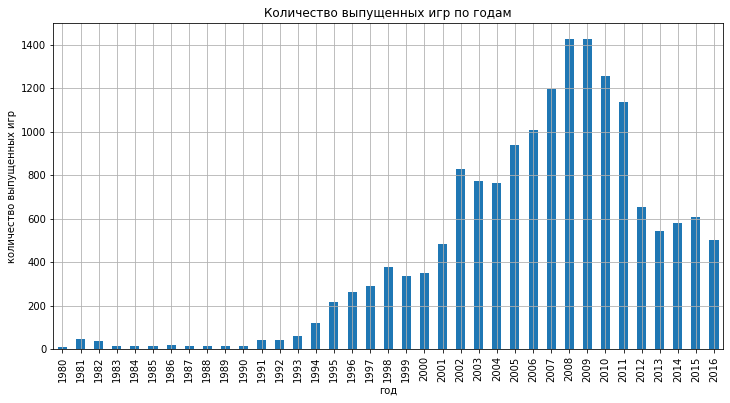

In [ ]:
#построим диаграмму распределения количества выпущенных игр по годам
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(12, 6), grid=True)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('год')
plt.ylabel('количество выпущенных игр')
plt.legend('', frameon=False)
plt.show()

Из диаграммы видно, что наибольшее количество игр было выпущено в **2008** и **2009**, а также в **2010**, **2007** и **2011** годах.

Кроме того, начиная с 2009 года количество выпущенных игр **снижалось**, за исключением незначительного роста в 2013-2015 годах.

#### Распределение продаж по платформам

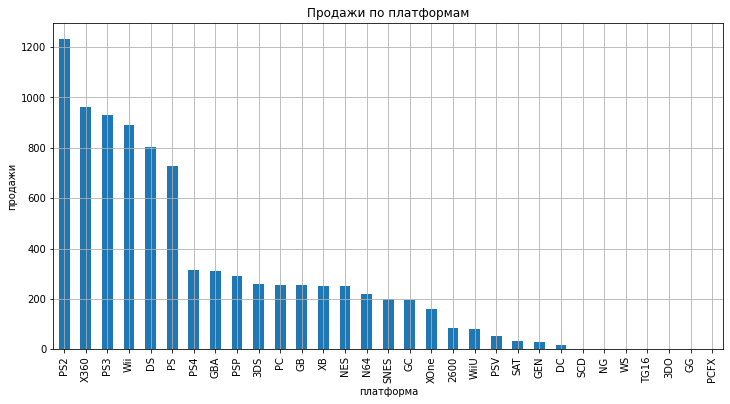

In [ ]:
#построим диаграмму распределения продаж игр по платформам
(games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

Из диаграммы видно, что наибольшие продажи характерны для платформ **PS2**, **X360**, **Wii**, **PS3**, **DS** и **PS**.

#### Распределение продаж на самых популярных платформах по годам

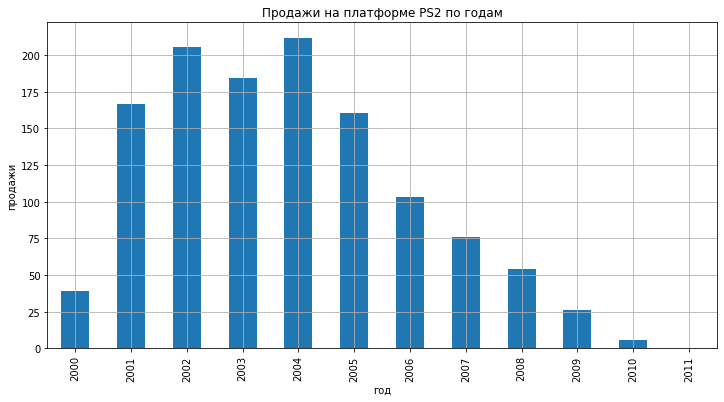

In [ ]:
#построим диаграмму распределения продаж на платформе PS2 по годам
(games.loc[games['platform'] == "PS2"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе PS2 по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

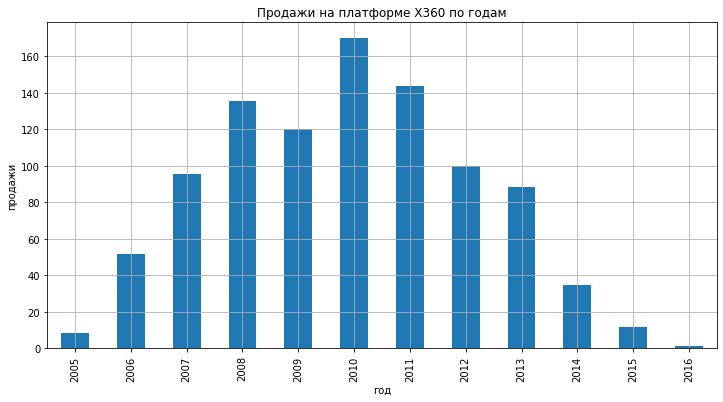

In [ ]:
#построим диаграмму распределения продаж на платформе X360 по годам
(games.loc[games['platform'] == "X360"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе X360 по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

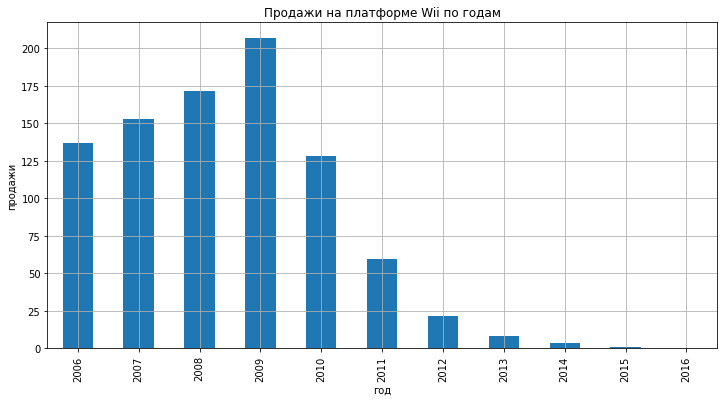

In [ ]:
#построим диаграмму распределения продаж на платформе Wii по годам
(games.loc[games['platform'] == "Wii"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе Wii по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

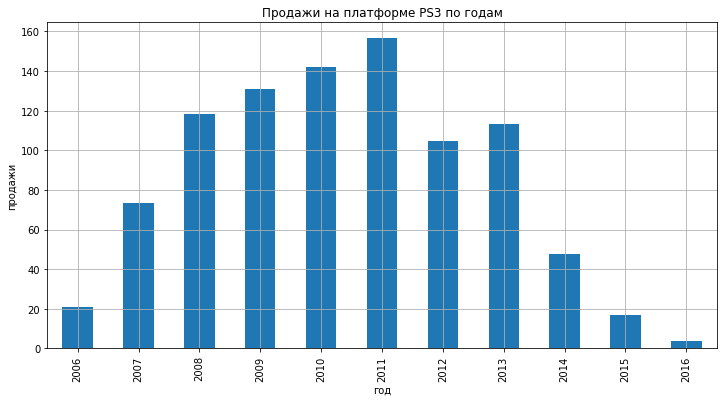

In [ ]:
#построим диаграмму распределения продаж на платформе PS3 по годам
(games.loc[games['platform'] == "PS3"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе PS3 по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

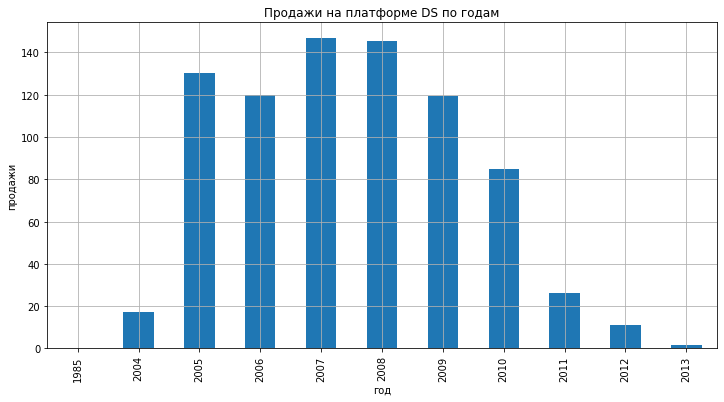

In [ ]:
#построим диаграмму распределения продаж на платформе PS3 по годам
(games.loc[games['platform'] == "DS"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе DS по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

In [ ]:
games.loc[(games['platform'] == 'DS') & (games['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


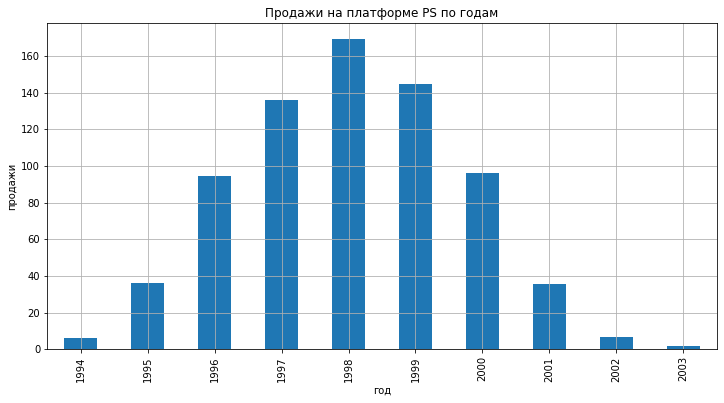

In [ ]:
#построим диаграмму распределения продаж на платформе PS3 по годам
(games.loc[games['platform'] == "PS"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе PS по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

Из диаграмм распределения продаж на самых популярных платформах по годам видно, что характерный период от появления до исчезновения платформы составляет **9-11 лет**.

#### Распределение продаж по платформам за актуальный период

Для целей исследования следует использовать данные за **4 года**.

In [ ]:
#создадим датафрейм с данными за актуальный период (с 2013 года)
actual_term = games.query('year_of_release >= 2013')

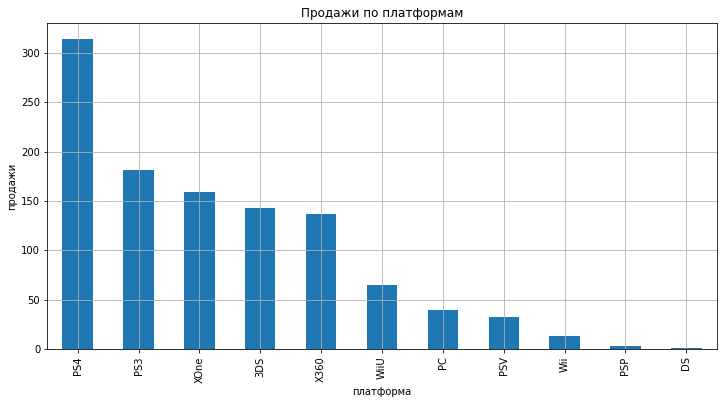

In [ ]:
#построим диаграмму распределения продаж игр по платформам за актуальный период
(actual_term
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

Из диаграммы видно, что наибольшие продажи *в актуальный период* характерны для платформ **PS4**, за ней с большим отрывом идут **PS3**, **XOne**, **3DS** и **X360**. При этом данные, полученные в **3.3 Распределение продаж на самых популярных платформах по годам**, свидетельствуют о том, что количество продаж игр на этих платформах **снижается**. Поэтому для построения прогноза на 2017 год следует обратиться к данным о других платформах.

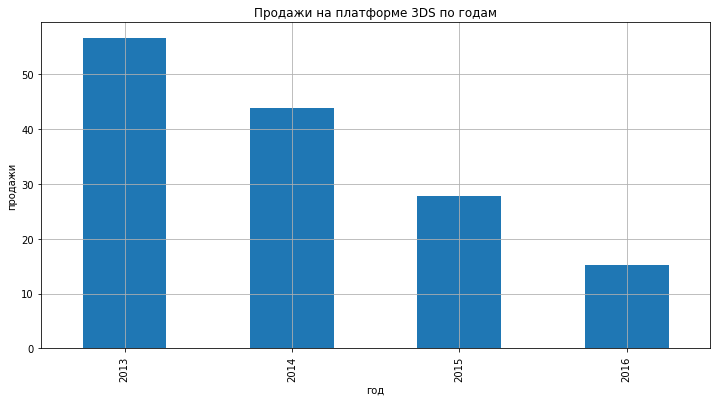

In [ ]:
#построим диаграмму распределения продаж на платформе 3DS по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "3DS"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе 3DS по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

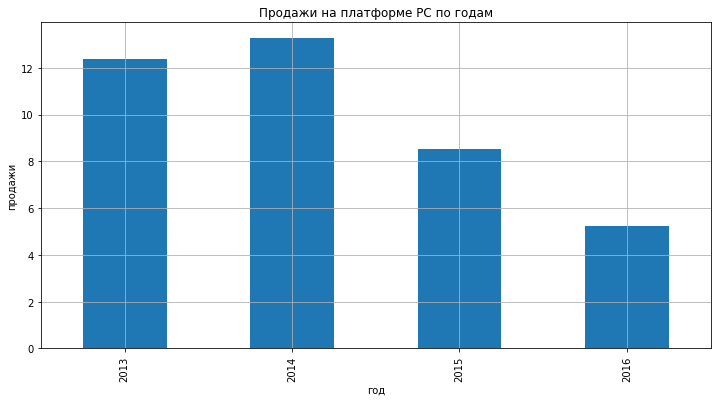

In [ ]:
#построим диаграмму распределения продаж на платформе PC по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "PC"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе PC по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

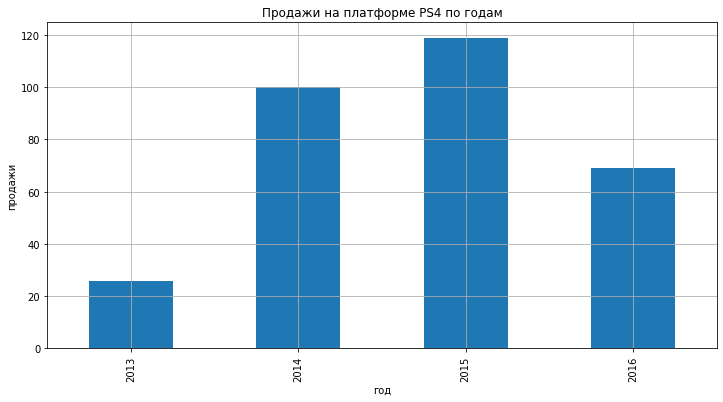

In [ ]:
#построим диаграмму распределения продаж на платформе PS4 по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "PS4"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе PS4 по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

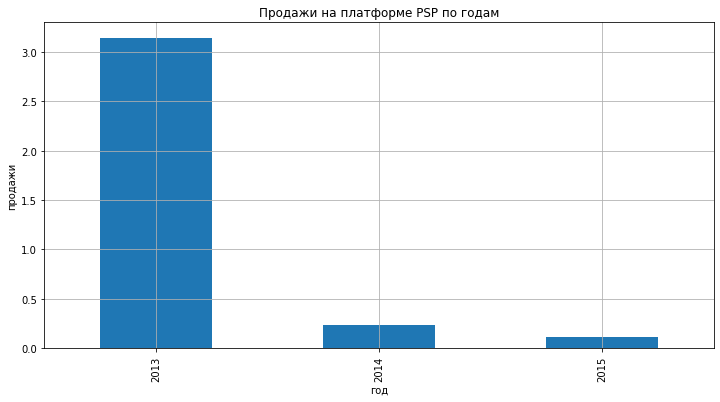

In [ ]:
#построим диаграмму распределения продаж на платформе PSP по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "PSP"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе PSP по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

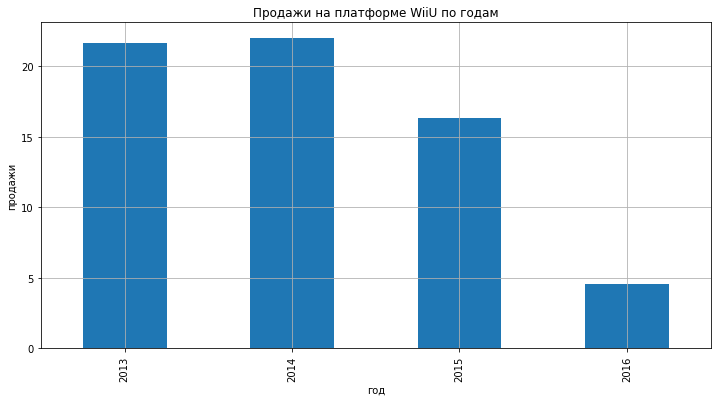

In [ ]:
#построим диаграмму распределения продаж на платформе WiiU по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "WiiU"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе WiiU по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

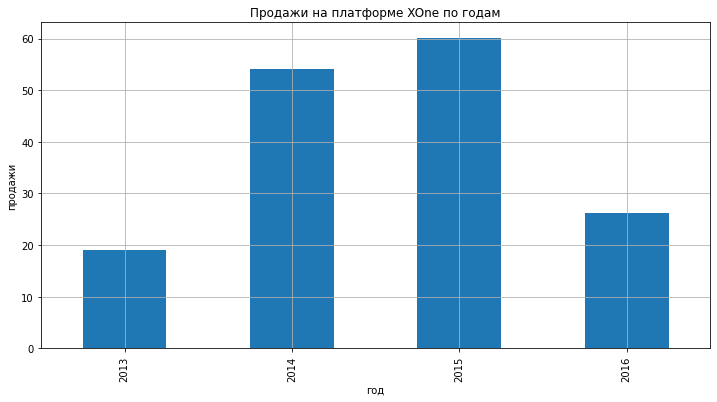

In [ ]:
#построим диаграмму распределения продаж на платформе XOne по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "XOne"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе XOne по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

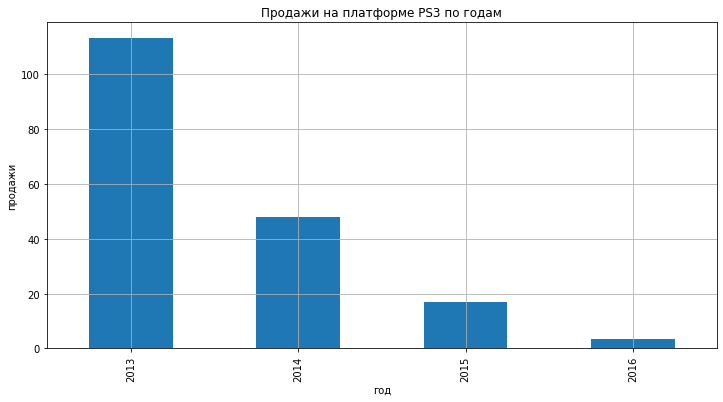

In [ ]:
#построим диаграмму распределения продаж на платформе PS3 по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "PS3"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе PS3 по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

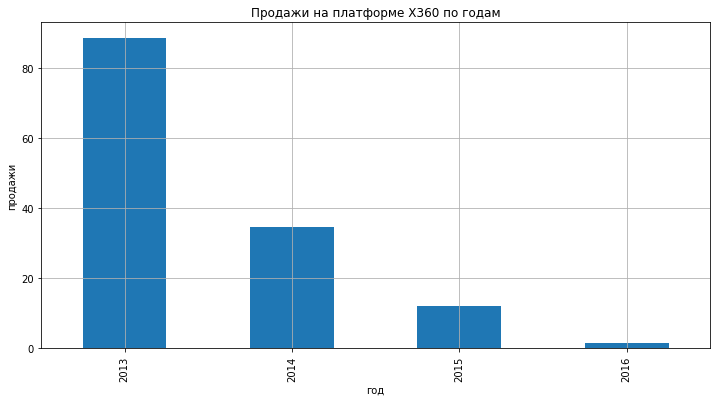

In [ ]:
#построим диаграмму распределения продаж на платформе X360 по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "X360"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе X360 по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

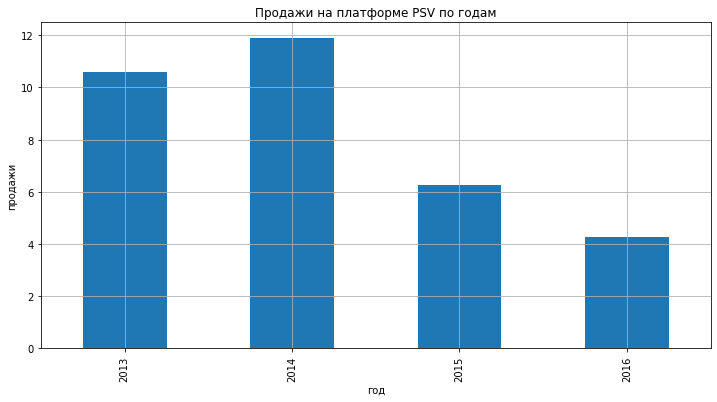

In [ ]:
#построим диаграмму распределения продаж на платформе PSV по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "PSV"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе PSV по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

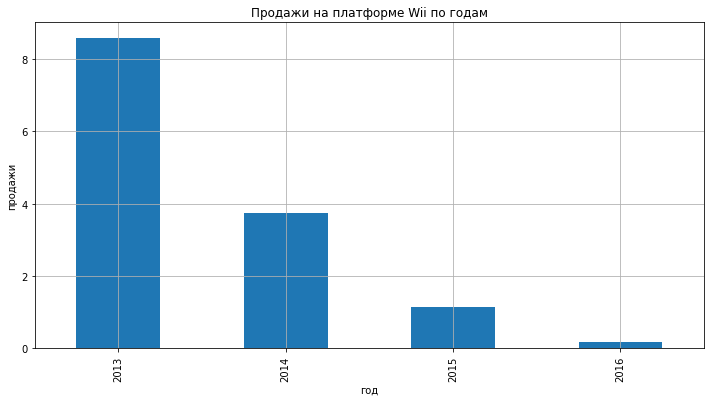

In [ ]:
#построим диаграмму распределения продаж на платформе Wii по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "Wii"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе Wii по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

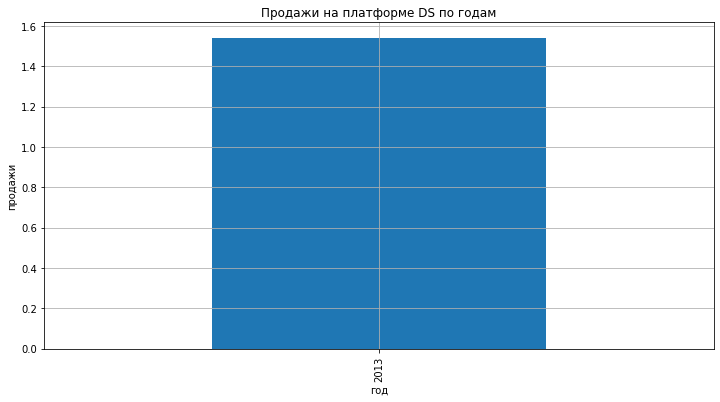

In [ ]:
#построим диаграмму распределения продаж на платформе DS по годам в актуальный период
(actual_term.loc[actual_term['platform'] == "DS"]
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи на платформе DS по годам')
plt.xlabel('год')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

На основе полученных данных к *потенциально прибыльным платформам* можно отнести **PS4** и **XOne**, поскольку:

1. общие продажи у этих платформ в актуальный период выше, чем у других,
2. *характерный период существования* у этих платформ далёк от завершения,
3. наблюдаемое падение продаж в 2016 году характерно для всех платформ и, скорее всего, свзяно с общим падением количества выпускаемых игр в последние годы (см. **3.1 Распределение выпущенных игр по годам**).

#### Распределение глобальных продаж игр по платформам

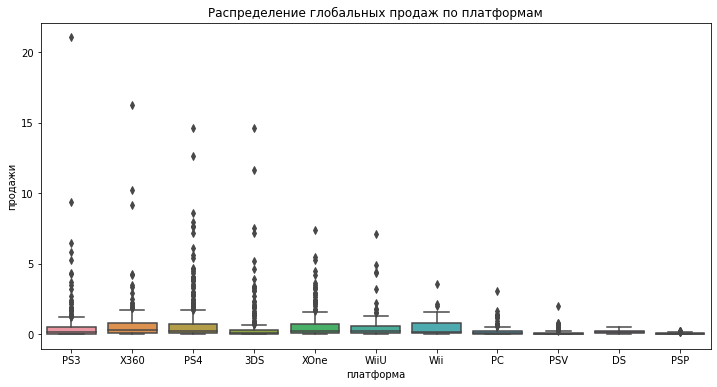

In [ ]:
#построим диаграмму распределения продаж игр по платформам
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=actual_term)
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.show()

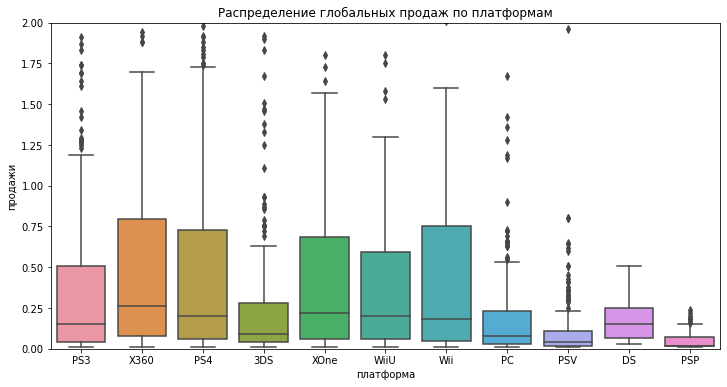

In [ ]:
#масштабируем диаграмму распределения продаж игр по платформам
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=actual_term).set_ylim([0, 2])
plt.title('Распределение глобальных продаж по платформам')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.show()

У всех платформ медианный уровень продаж не превышает **0.25 млн копий**.

Размах значений у платформ **PS3**, **X360**, **PS4**, **XOne**, **WiiU**, **Wii** достаточно большой, у остальных платформ он меньше.

Размах значений у платформ **PS3**, **X360**, **PS4**, **3DS**, **XOne**, **PC** довльно много выбросов.

#### Влияние отзывов на продажи внутри одной платформы

0.406567902061781

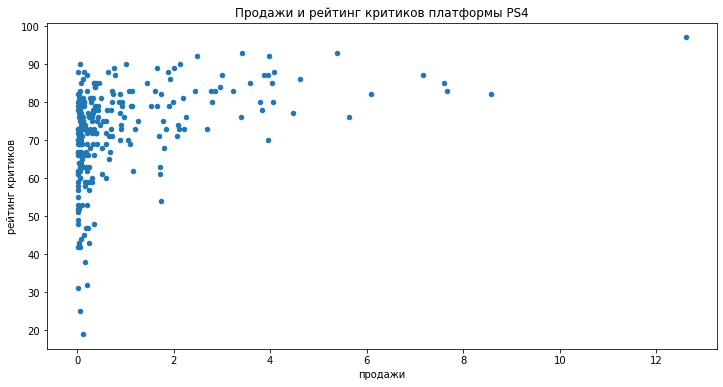

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга критиков платформы PS4
t1 = actual_term.query('platform == "PS4"')
display(t1['total_sales'].corr(t1['critic_score']))
t1.plot(x='total_sales', y='critic_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы PS4')
plt.xlabel('продажи')
plt.ylabel('рейтинг критиков')
plt.legend('', frameon=False)
plt.show()

-0.031957110204556376

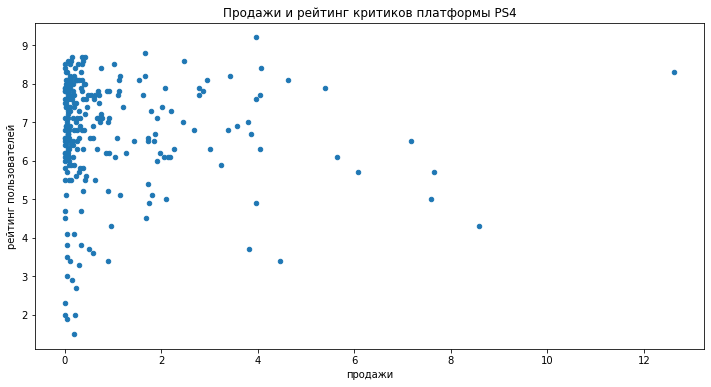

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга пользователей платформы PS4
display(t1['total_sales'].corr(t1['user_score']))
t1.plot(x='total_sales', y='user_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы PS4')
plt.xlabel('продажи')
plt.ylabel('рейтинг пользователей')
plt.legend('', frameon=False)
plt.show()

Между уровнем продаж и рейтингом критиков существует *умеренная положительная связь*, а между уровнем продаж и рейтингом пользователей - *слабая отрицательная связь*. Это означает, что рейтинги критиков и пользователей **мало влияют на продажи**. Кроме того, рейтинг критиков больше способствет улучшению продаж, чем рейтинг пользователей.

#### Влияние отзывов на продажи по другим платформам

##### PS3

0.3342853393371919

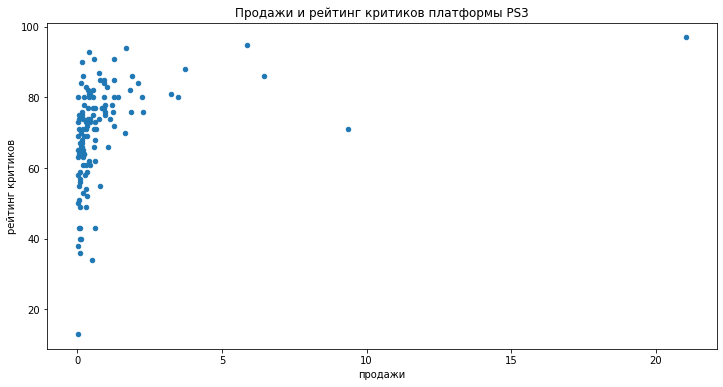

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга критиков платформы PS3
t1 = actual_term.query('platform == "PS3"')
display(t1['total_sales'].corr(t1['critic_score']))
t1.plot(x='total_sales', y='critic_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы PS3')
plt.xlabel('продажи')
plt.ylabel('рейтинг критиков')
plt.legend('', frameon=False)
plt.show()

0.0023944027357566925

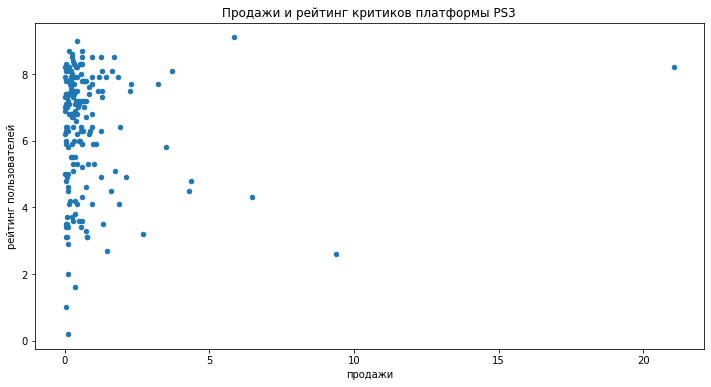

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга пользователей платформы PS3
display(t1['total_sales'].corr(t1['user_score']))
t1.plot(x='total_sales', y='user_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы PS3')
plt.xlabel('продажи')
plt.ylabel('рейтинг пользователей')
plt.legend('', frameon=False)
plt.show()

##### XOne

0.41699832800840175

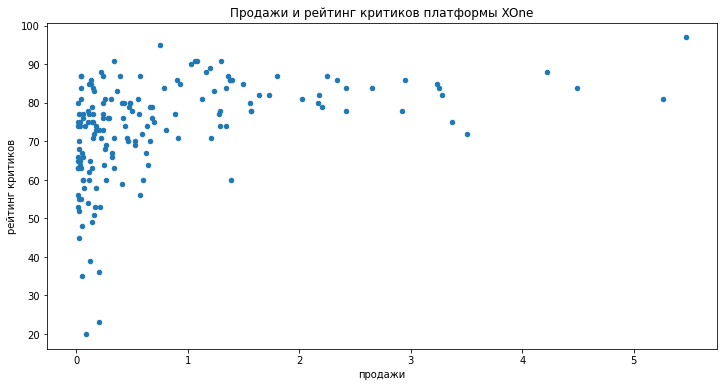

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга критиков платформы XOne
t1 = actual_term.query('platform == "XOne"')
display(t1['total_sales'].corr(t1['critic_score']))
t1.plot(x='total_sales', y='critic_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы XOne')
plt.xlabel('продажи')
plt.ylabel('рейтинг критиков')
plt.legend('', frameon=False)
plt.show()

-0.06892505328279412

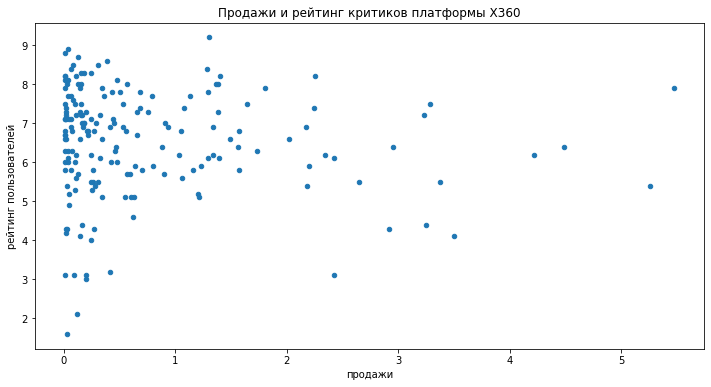

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга пользователей платформы X360
display(t1['total_sales'].corr(t1['user_score']))
t1.plot(x='total_sales', y='user_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы X360')
plt.xlabel('продажи')
plt.ylabel('рейтинг пользователей')
plt.legend('', frameon=False)
plt.show()

##### 3DS

0.35705661422881035

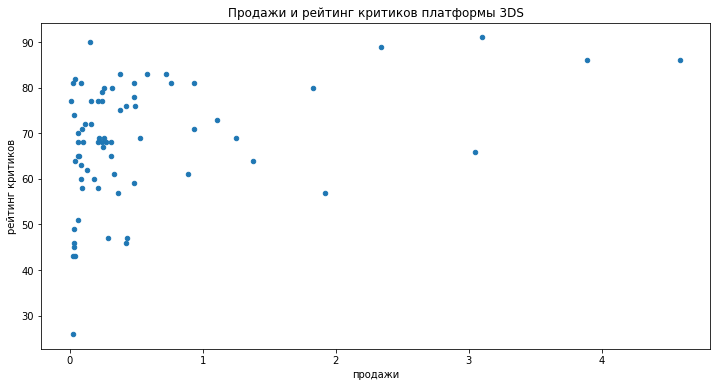

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга критиков платформы 3DS
t1 = actual_term.query('platform == "3DS"')
display(t1['total_sales'].corr(t1['critic_score']))
t1.plot(x='total_sales', y='critic_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы 3DS')
plt.xlabel('продажи')
plt.ylabel('рейтинг критиков')
plt.legend('', frameon=False)
plt.show()

0.24150411773563016

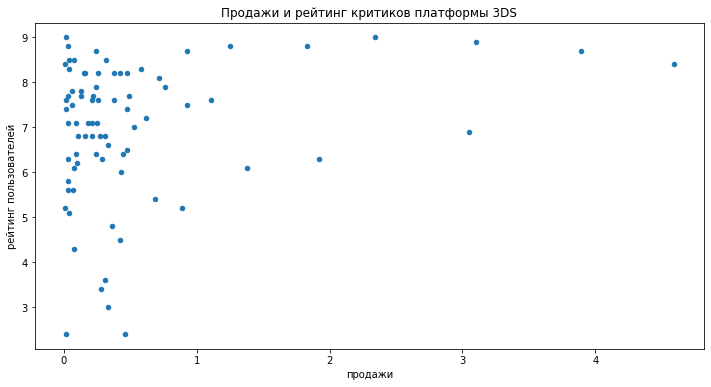

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга пользователей платформы 3DS
display(t1['total_sales'].corr(t1['user_score']))
t1.plot(x='total_sales', y='user_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы 3DS')
plt.xlabel('продажи')
plt.ylabel('рейтинг пользователей')
plt.legend('', frameon=False)
plt.show()

##### X360

0.3503445460228664

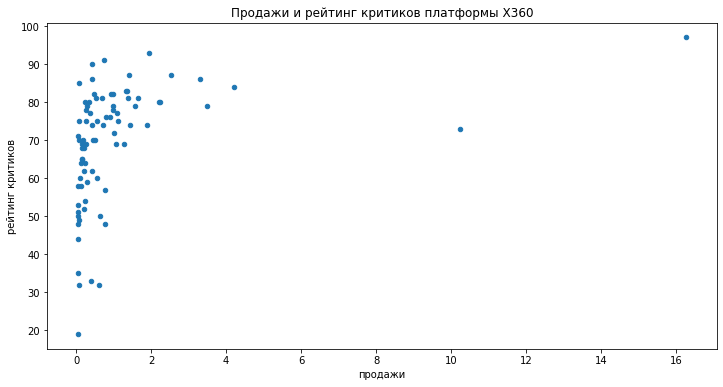

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга критиков платформы X360
t1 = actual_term.query('platform == "X360"')
display(t1['total_sales'].corr(t1['critic_score']))
t1.plot(x='total_sales', y='critic_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы X360')
plt.xlabel('продажи')
plt.ylabel('рейтинг критиков')
plt.legend('', frameon=False)
plt.show()

-0.011742185147181342

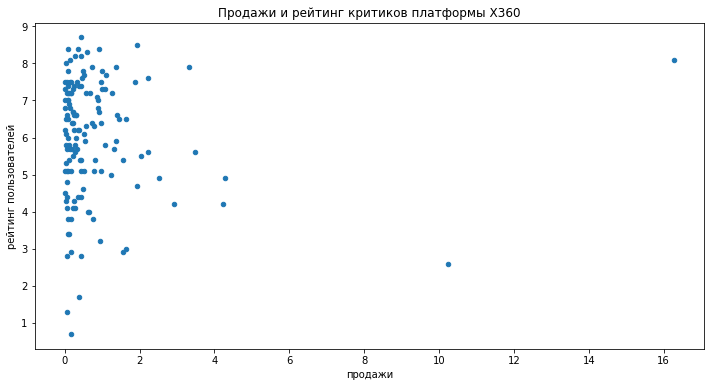

In [ ]:
#найдём корреляцию и построим диаграмму рассеяния для продаж и рейтинга пользователей платформы X360
display(t1['total_sales'].corr(t1['user_score']))
t1.plot(x='total_sales', y='user_score', figsize=(12, 6), kind='scatter')
plt.title('Продажи и рейтинг критиков платформы X360')
plt.xlabel('продажи')
plt.ylabel('рейтинг пользователей')
plt.legend('', frameon=False)
plt.show()

Во всех случаях между уровнем продаж и рейтингом критиков, а также между уровнем продаж и рейтингом пользователей существует *слабая положительная*, *умеренная положительная*, либо *слабая отрицательная связь*. Это означает соответствует выводам, полученным в **3.6 Влияние отзывов на продажи внутри одной платформы**.

#### Прибыльность жанров

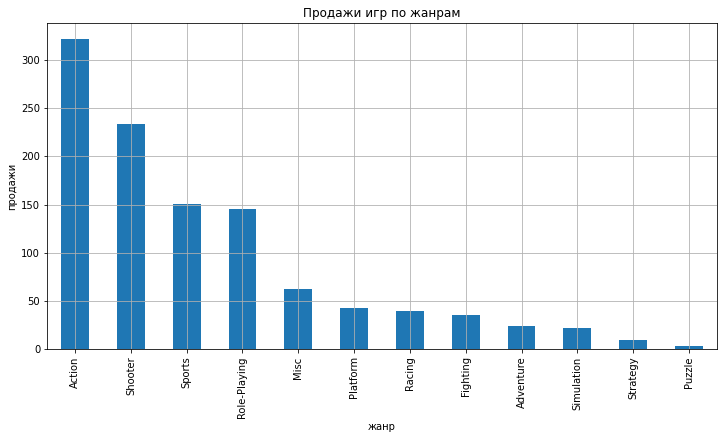

In [ ]:
#построим диаграмму распределения продаж игр по жанрам
#(games.pivot_table(index='genre', values='total_sales', aggfunc='sum')
(actual_term.pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи игр по жанрам')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

Жанрами с наиболее высокими продажами являются **Action**, **Shooter**, **Sports** и **Role-Playing**; с наименее высокими - **Puzzle**, **Strategy**, **Simulation** и **Adventure**.

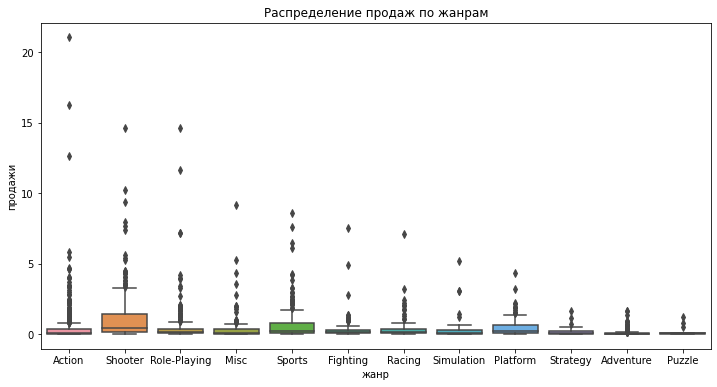

In [ ]:
#построим диаграмму распределения продаж игр по жанрам
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=actual_term)
plt.title('Распределение продаж по жанрам')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

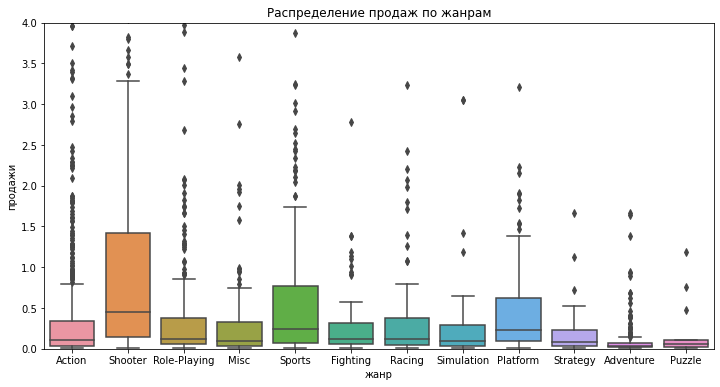

In [ ]:
#масштабируем диаграмму распределения продаж игр по жанрам
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=actual_term).set_ylim([0, 4])
plt.title('Распределение продаж по жанрам')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

Жанрами с наибольшими медианными продажами являются **Shooter**, **Sports** и **Platform**. Таким образом, можно заключить, что игры этих жанров являются самыми прибыльными.

### Портрет пользователя по каждому региону

#### Северная Америка

##### Наиболее популярные платформы

In [ ]:
#построим диаграмму распределения продаж игр по платформам в Северной Америке
actual_term.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


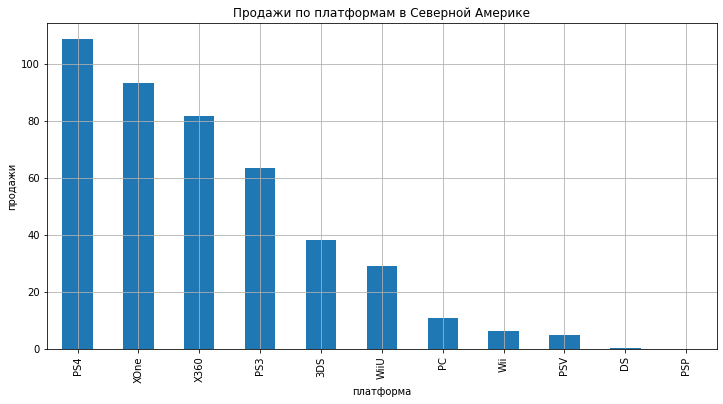

In [ ]:
#построим диаграмму распределения продаж игр по платформам в Северной Америке
(actual_term
 .pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по платформам в Северной Америке')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

##### Наиболее популярные жанры

In [ ]:
#построим диаграмму распределения продаж игр по жанрам в Северной Америке
actual_term.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


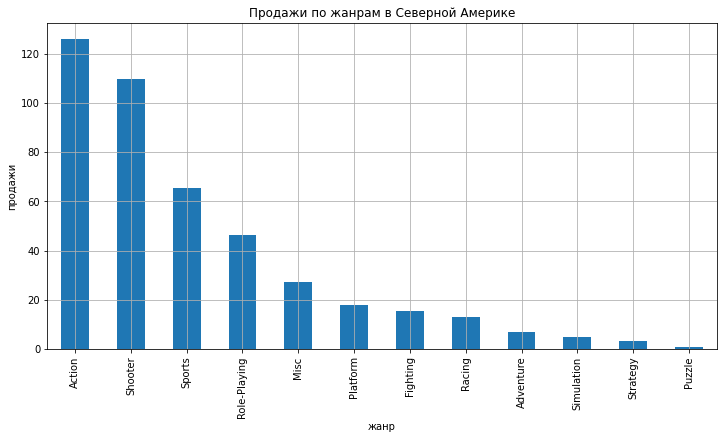

In [ ]:
#построим диаграмму распределения продаж игр по жанрам в Северной Америке
(actual_term
 .pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по жанрам в Северной Америке')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

##### Влияние рейтинга ESRB

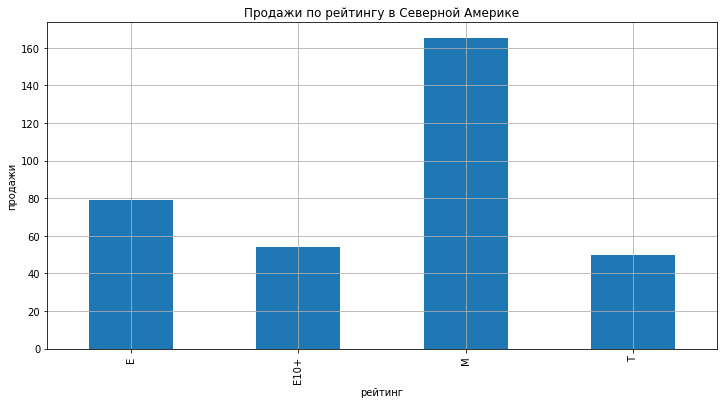

In [ ]:
#построим диаграмму распределения продаж игр по рейтингу в Северной Америке
(actual_term
 .pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по рейтингу в Северной Америке')
plt.xlabel('рейтинг')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

**Портрет пользователя из Северной Америки:**

1. наиболее популярные платформы - **PS4**, **XOne**, **X360**, **PS3**, **3DS**;

2. наиболее популярные жанры - **Action**, **Shooter**, **Sports**, **Role-Playing**, **Misc**;

3. больше всего продаются игры с рейтингом **M** (для старших подростков) и **E** (для всех возрастов).

#### Европа

##### Наиболее популярные платформы

In [ ]:
#построим диаграмму распределения продаж игр по платформам в Европе
actual_term.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


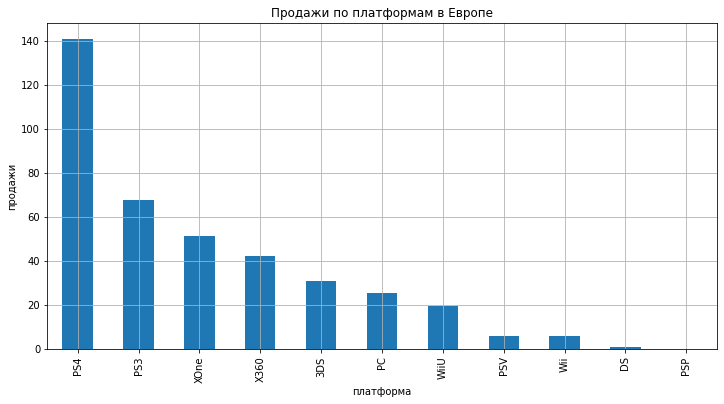

In [ ]:
#построим диаграмму распределения продаж игр по платформам в Европе
(actual_term
 .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по платформам в Европе')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

##### Наиболее популярные жанры

In [ ]:
#построим диаграмму распределения продаж игр по жанрам в Европе
actual_term.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


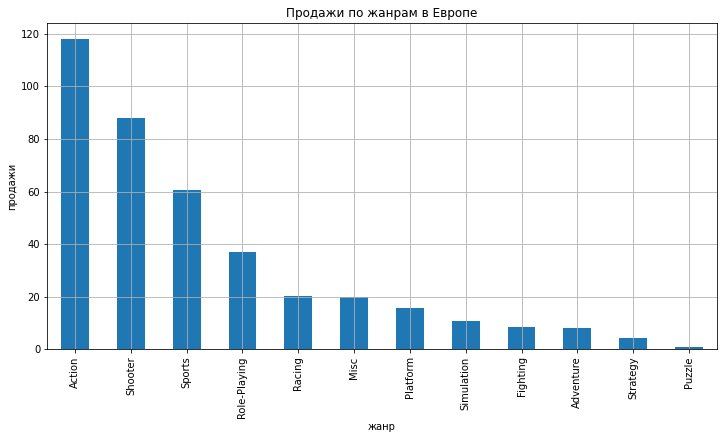

In [ ]:
#построим диаграмму распределения продаж игр по жанрам в Европе
(actual_term
 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по жанрам в Европе')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

##### Влияние рейтинга ESRB

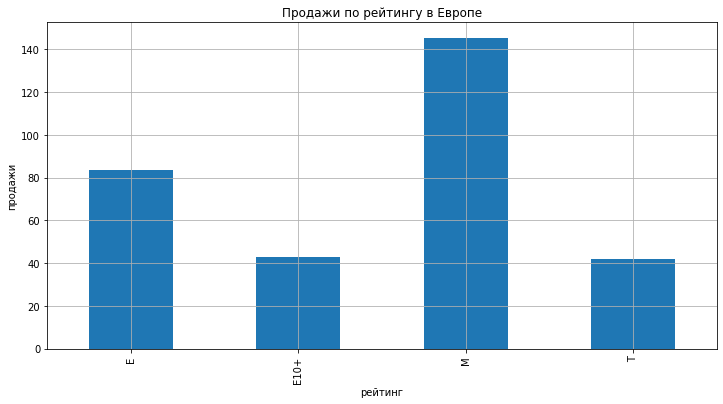

In [ ]:
#построим диаграмму распределения продаж игр по рейтингу в Европе
(actual_term
 .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по рейтингу в Европе')
plt.xlabel('рейтинг')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

**Портрет пользователя из Европы:**

1. наиболее популярные платформы - **PS4**, **PS3**, **XOne**, **X360**, **3DS**;

2. наиболее популярные жанры - **Action**, **Shooter**, **Sports**, **Role-Playing**, **Racing**;

3. больше всего продаются игры с рейтингом **M** (для старших подростков) и **E** (для всех возрастов).

#### Япония

##### Наиболее популярные платформы

In [ ]:
#построим диаграмму распределения продаж игр по платформам в Японии
actual_term.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


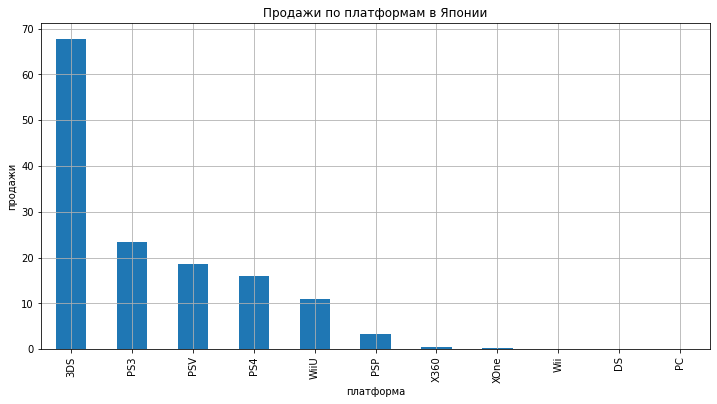

In [ ]:
#построим диаграмму распределения продаж игр по платформам в Японии
(actual_term
 .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по платформам в Японии')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

##### Наиболее популярные жанры

In [ ]:
#построим диаграмму распределения продаж игр по жанрам в Японии
actual_term.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


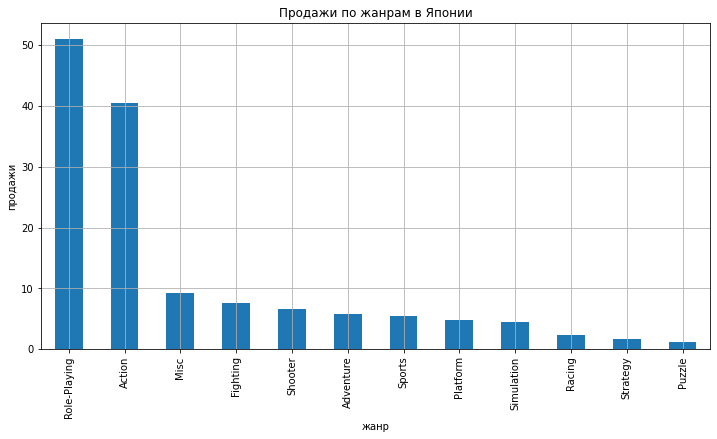

In [ ]:
#построим диаграмму распределения продаж игр по жанрам в Японии
(actual_term
 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по жанрам в Японии')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

##### Влияние рейтинга ESRB

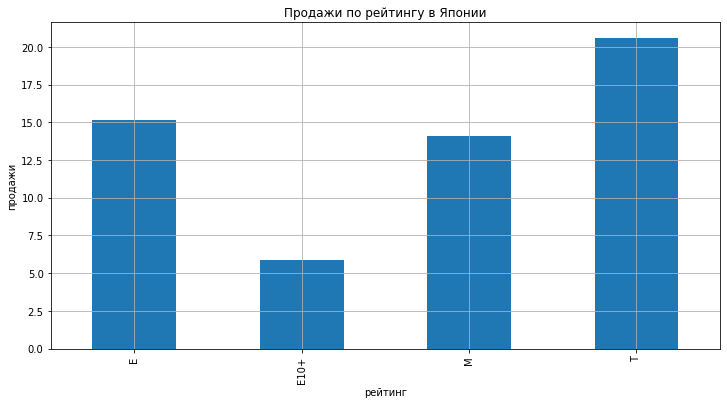

In [ ]:
#построим диаграмму распределения продаж игр по рейтингу в Японии
(actual_term
 .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .plot(kind='bar', figsize=(12, 6), grid=True))
plt.title('Продажи по рейтингу в Японии')
plt.xlabel('рейтинг')
plt.ylabel('продажи')
plt.legend('', frameon=False)
plt.show()

**Портрет пользователя из Японии:**

1. наиболее популярные платформы - **3DS**, **PS3**, **PSV**, **PS4**, **WiiU**;

2. наиболее популярные жанры - **Role-Playing**, **Action**, **Misc**, **Fighting**, **Shooter**;

3. больше всего продаются игры с рейтингом **T** (для подростков), **E** (для всех возрастов) и **М** (для старших подростков).

### Проверка гипотез

Поскольку обе гипотезы касаются пользовательского рейтинга, следует отобрать данные об играх, для которых он известен.

In [ ]:
#создадим датафрейм games_filled с данными ою играх, для которых известен пользовательский рейтинг
games_user_score = actual_term.dropna(subset=['user_score']).reset_index(drop=True)

#### Гипотеза №1

**Нулевая гипотеза:** средние пользовательские рейтинги платформ *XOne* и *PC* равны

**Альтернативная гипотеза:** средние пользовательские рейтинги платформ *XOne* и *PC* неравны

In [ ]:
sample1 = games_user_score.loc[games_user_score['platform'] == 'XOne', 'user_score']
sample2 = games_user_score.loc[games_user_score['platform'] == 'PC', 'user_score']

print('среднее первой выборки:', sample1.mean())
print('среднее второй выборки:', sample2.mean())

alpha = 0.05

results = st.ttest_ind(sample1, sample2, alternative='two-sided')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза не отвергнута')

среднее первой выборки: 6.521428571428572
среднее второй выборки: 6.2696774193548395
p-value: 0.14012658403611647
Нулевая гипотеза не отвергнута


Нулевая гипотеза не отвергнута, следовательно, **есть основание считать, что средние пользовательские рейтинги платформ *XOne* и *PC* равны**.

#### Гипотеза №2

**Нулевая гипотеза:** средние пользовательские рейтинги жанров *Action* и *Sports* равны

**Альтернативная гипотеза:** средние пользовательские рейтинги жанров *Action* и *Sports* неравны

In [ ]:
sample1 = games_user_score.loc[games_user_score['genre'] == 'Action', 'user_score']
sample2 = games_user_score.loc[games_user_score['genre'] == 'Sports', 'user_score']

print('среднее первой выборки:', sample1.mean())
print('среднее второй выборки:', sample2.mean())

alpha = 0.05

results = st.ttest_ind(sample1, sample2, alternative='two-sided')

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Нулевая гипотеза отвергнута')
else:
    print('Нулевая гипотеза не отвергнута')

среднее первой выборки: 6.837532133676092
среднее второй выборки: 5.238124999999999
p-value: 1.0517832389140023e-27
Нулевая гипотеза отвергнута


Нулевая гипотеза отвергнута, следовательно, **есть основание считать, что средние пользовательские рейтинги жанров *Action* и *Sports* неравны**.

Нулевая гипотеза была сформулирована так, как рекомендовано для t-теста, то есть с предположением равенства сравниваемых средних. В качестве альтернативной гипотезы выступает суждение, проверка которого является задачей исследования.

Для проверки гипотез был использован t-тест, поскольку проверются гипотезы о среднем выборок.

### Вывод

#### Предобработка данных

В ходе предобработки данных:

1. наименования всех столбцов были приведены к нижнему регистру;

2. типы данных столбца `year_of_release` были приведены к типу `int`, данные столбца `user_score` - к типу `float`, в последнем притом значение `tbd` было заменено пропуском значения;

3. были удалены пропуски в столбцах `name`, `year_of_release` и `genre`;

4. был добавлен столбец `total_sales` с данными о суммарных продажах каждой игры;

5. были удалены строки, с повторяющимися значениями в столбцах `name`, `platform` и `year_of_release`.

#### Исследовательский анализ данных

В ходе исследовательского анализа данных были получены следующие выводы:

1. Наибольшее количество игр было выпущено в **2008** и **2009**, а также в **2010**, **2007** и **2011** годах. Кроме того, начиная с 2009 года количество выпущенных игр **снижалось**, за исключением незначительного роста в 2013-2015 годах.

2. Наибольшие продажи характерны для платформ **PS2**, **X360**, **Wii**, **PS3**, **DS** и **PS**.

3. Характерный период от появления до исчезновения платформы составляет **9-11 лет**.

4. Наибольшие продажи *в актуальный период* характерны для платформ **PS4**, **PS3**, **XOne**, **3DS** и **X360**.

5. К *потенциально прибыльным платформам* можно отнести **PS4** и **XOne**.

6. У всех платформ медианный уровень продаж не превышает **0.25 млн копий**; размах значений у платформ **PS3**, **X360**, **PS4**, **XOne**, **WiiU**, **Wii** достаточно большой, у остальных платформ он меньше; размах значений у платформ **PS3**, **X360**, **PS4**, **3DS**, **XOne**, **PC** довльно много выбросов.

7. Между уровнем продаж и рейтингом критиков, а также между уровнем продаж и рейтингом пользователей существует *слабая положительная*, *умеренная положительная*, либо *слабая отрицательная связь*. Это означает, что рейтинги критиков и пользователей **слабо влияют на продажи**.

8. Наиболее прибыльными жанрами можно назвать **Shooter**, **Sports** и **Platform**.

#### Портрет пользователя по каждому региону

Был составлен портрет среднего пользователя по каждому региону:

*Для пользователя из Северной Америки*:

1. наиболее популярные платформы - **PS4**, **XOne**, **X360**, **PS3**, **3DS**;

2. наиболее популярные жанры - **Action**, **Shooter**, **Sports**, **Role-Playing**, **Misc**;

3. больше всего продаются игры с рейтингом **M** (для старших подростков) и **E** (для всех возрастов).

*Для пользователя из Европы:*

1. наиболее популярные платформы - **PS4**, **PS3**, **XOne**, **X360**, **3DS**;

2. наиболее популярные жанры - **Action**, **Shooter**, **Sports**, **Role-Playing**, **Racing**;

3. больше всего продаются игры с рейтингом **M** (для старших подростков) и **E** (для всех возрастов).

*Для пользователя из Японии:*

1. наиболее популярные платформы - **3DS**, **PS3**, **PSV**, **PS4**, **WiiU**;

2. наиболее популярные жанры - **Role-Playing**, **Action**, **Misc**, **Fighting**, **Shooter**;

3. больше всего продаются игры с рейтингом **T** (для подростков), **E** (для всех возрастов) и **М** (для старших подростков).

#### Проверка гипотез

В результате статистического анализа данных были проверены две гипотезы, получены следующие выводы:

1. Есть основание считать, что средние пользовательские рейтинги платформ *XOne* и *PC* равны.

2. Есть основание считать, что средние пользовательские рейтинги жанров *Action* и *Sports* неравны.